In [1]:
import numexpr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
%matplotlib nbagg

In [2]:
def fmt_items(lines,max_lines=0):
    max_width=max([len(line)for line in lines])
    empty =' '*max_width
    lines = [line.ljust(max_width)for line in lines]
    lines += [empty]*(max_lines - len(lines))
    return lines
def pp (*list):
    lines = [ str(item).split('\n') for item in list]
    max_lines=max([len(item)for  item in lines])
    lines = [fmt_items(item,max_lines=max_lines)for item in lines]
    lines_t= np.array(lines).T
    print('\n'.join([' '.join(line) for  line in lines_t]))

# Machine Learning


## chapter 5

In [3]:
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0,
                           random_state=4, n_clusters_per_class=1,
                           n_classes=2,class_sep =3)

In [4]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

[-1, 4, -2, 7]

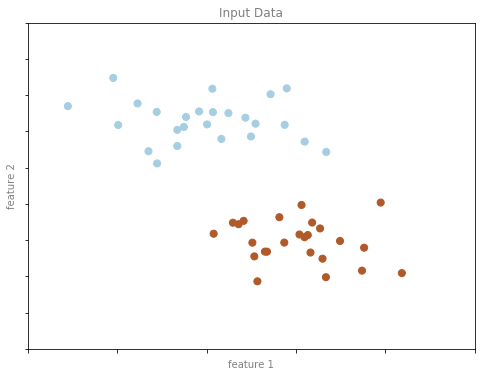

In [6]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])



[-1, 4, -2, 7]

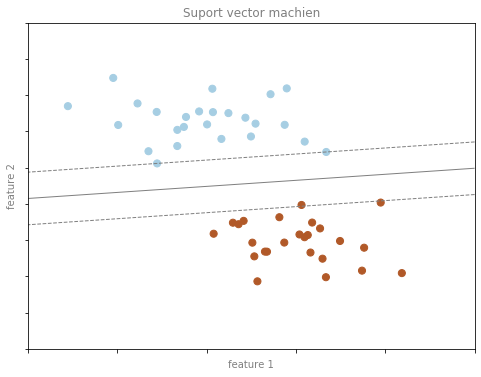

In [7]:
#get counters 
x1 = np.linspace(-1,4,10)
y1 = np.linspace(-2,7,10)
xx,yy = np.meshgrid(x1,y1)
Z = np.array([clf.decision_function([X]) for X in zip(xx.flat,yy.flat)]).reshape(10,10)
#draw plot
fig,ax = plt.subplots(figsize=(8,6))
line_style = dict(levels = [-1,0,1],
                 linestyles  = ['dashed','solid','dashed'],
                 colors = 'gray',linewidths = 1)
ax.scatter(X[:,0],X[:,1],c=y,**point_style)
ax.contour(xx,yy,Z,**line_style)
#format
format_plot(ax,'Suport vector machien')
ax.axis([-1,4,-2,7])

In [8]:
rng  = np.random.RandomState(1)


X = rng.randn(200,2)
y = np.dot(X,[-2,1])+0.1 * rng.randn(X.shape[0])

model = LinearRegression()
model.fit(X,y)

X1 = rng.randn(100,2)
y1 = model.predict(X1)
print(X.shape)

(200, 2)


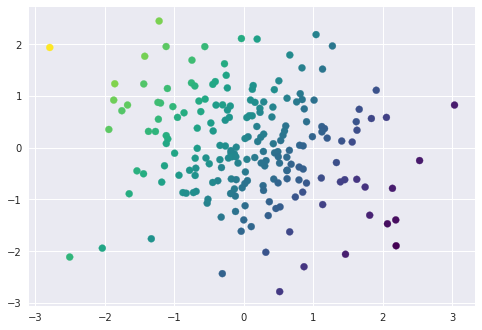

In [9]:
with plt.style.context('seaborn'):
    fig,ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

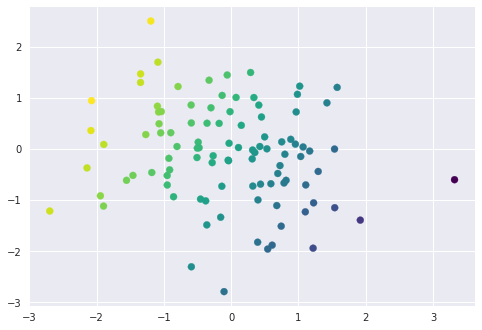

In [10]:
with plt.style.context('seaborn'):
    plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='viridis')

In [11]:
print(y.min(),y.max())

-6.131671142784251 7.654319420422705


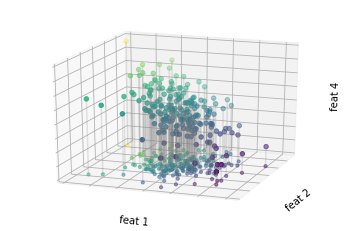

In [12]:
points = np.hstack([X,y[:,None]]).reshape(-1,1,3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8


fig = plt.figure()
ax = plt.subplot(projection = '3d')
ax.scatter(X[:,0],X[:,1],y, c=y,s=20,cmap = 'viridis')
ax.add_collection3d(Line3DCollection(segments,color='gray',alpha=0.2))
ax.scatter(segments[:, 0,0 ],segments[:, 0,1 ],segments[:, 0,2 ],c=y,s=10,cmap = 'viridis',alpha = 0.5)

ax.patch.set_facecolor('white')
ax.view_init(elev = 20,azim = -70)
ax.set_zlim3d(-8,8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel = 'feat 1',ylabel = 'feat 2', zlabel = 'feat 4')

ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)

for tick in ax.xaxis.get_major_ticks() :
    tick.set_visible(False)
for tick in ax.yaxis.get_major_ticks() :
    tick.set_visible(False)
for tick in ax.zaxis.get_major_ticks() :
    tick.set_visible(False)

[-4, 4, -3, 3]

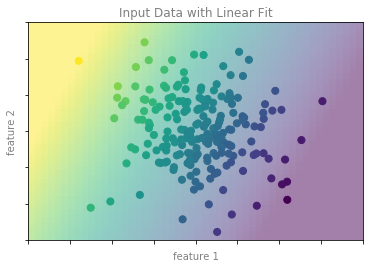

In [13]:
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])



In [14]:
from sklearn.cluster import KMeans
X,y = make_blobs(n_samples=100,centers = 4,random_state=42,cluster_std=1.5, )


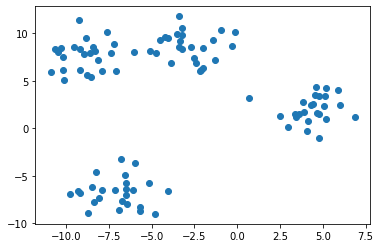

In [15]:
plt.scatter(X[:,0],X[:,1])

In [16]:
model = KMeans(4)

In [17]:
model.fit(X)
y = model.predict(X)

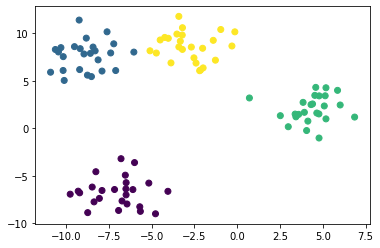

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'viridis')

In [19]:
from sklearn.datasets import make_swiss_roll

In [20]:
X,y = make_swiss_roll(200,noise = 0.5 ,random_state = 42)


In [21]:
X1=X[:,[0,2]]

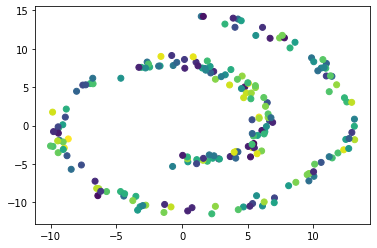

In [22]:

plt.scatter(X1[:,0],X1[:,1],c=X[:,1],cmap = 'viridis')

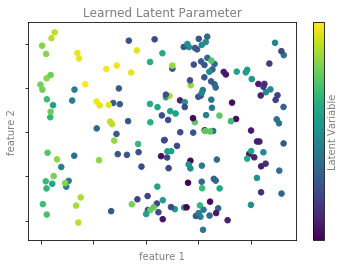

In [23]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')


In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


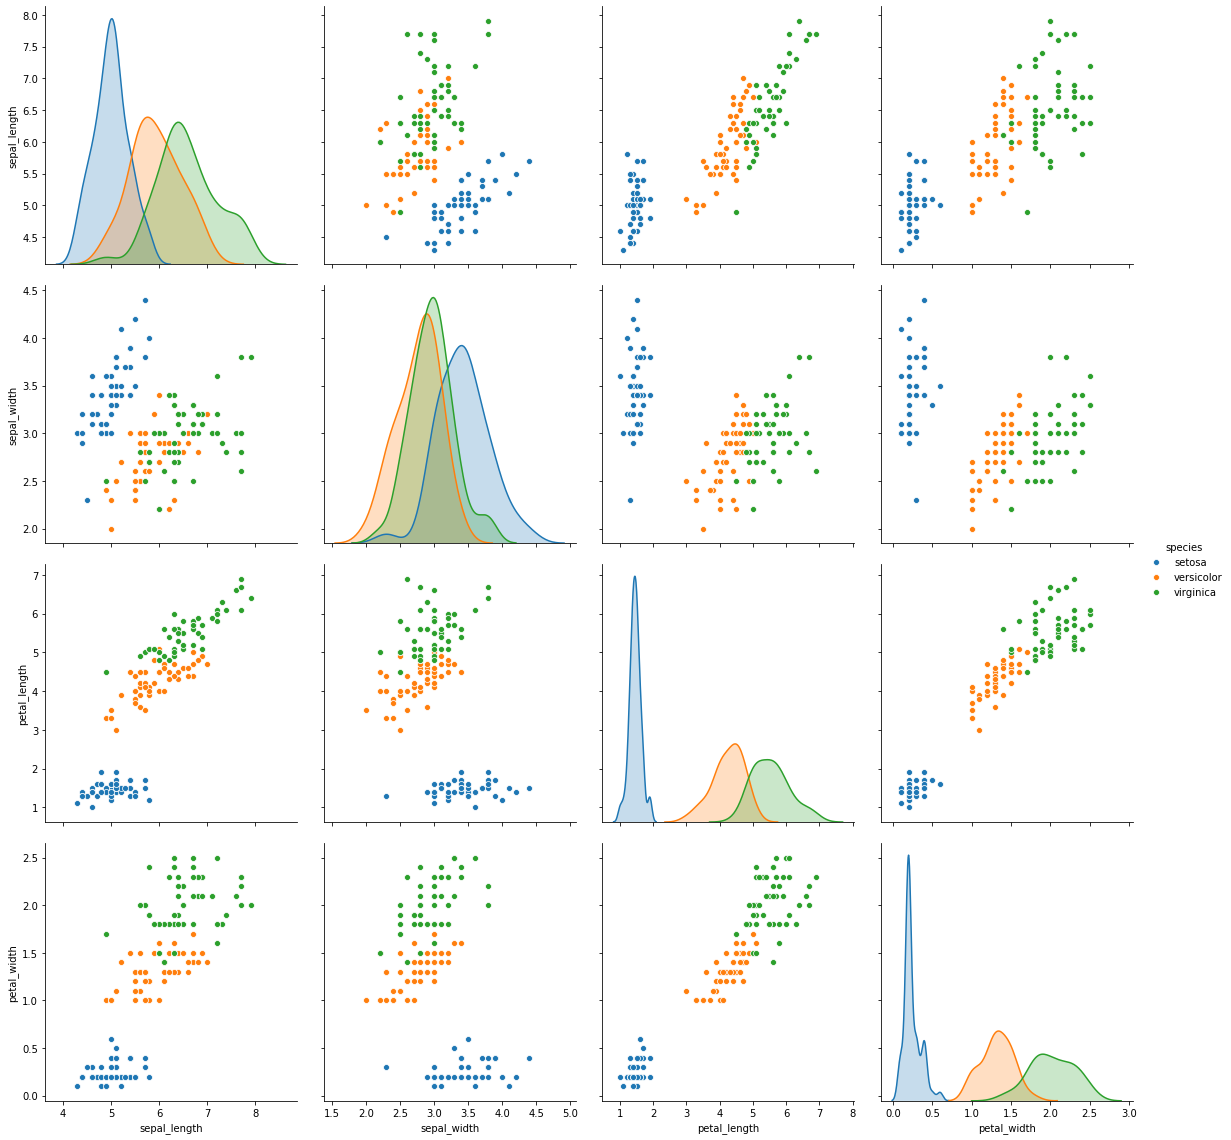

In [32]:
sns.pairplot(iris,hue='species',height=4)

In [33]:
print(iris.shape)
X = iris.drop('species',axis = 1)
X.shape

(150, 5)


(150, 4)

In [34]:
y = iris['species']
y.shape

(150,)

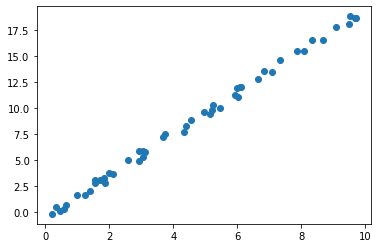

In [30]:
plt.scatter(x,y)

In [16]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.9736842105263158

In [56]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)
X_2D=model.transform(X)

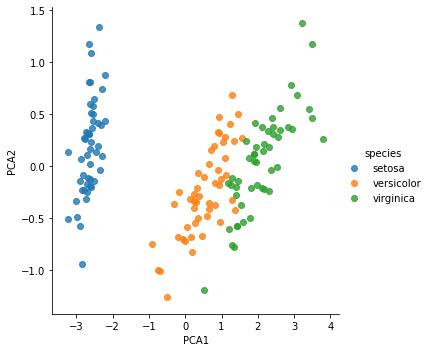

In [64]:
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot('PCA1','PCA2',hue='species',data=iris,fit_reg=False)

In [67]:
from sklearn.mixture import GaussianMixture as GMM
model = GMM(n_components=3,covariance_type='full')
model.fit(X)
y_gmm = model.predict(X)

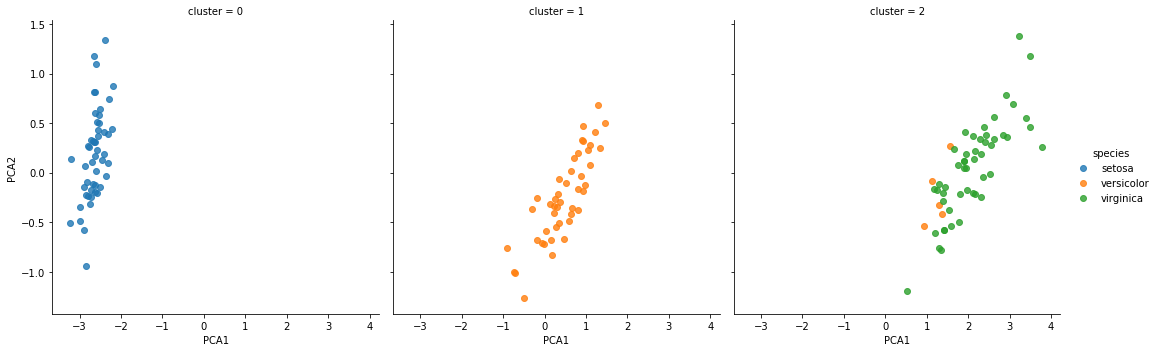

In [70]:
iris['cluster']=y_gmm
sns.lmplot('PCA1','PCA2',data=iris,hue='species',col='cluster',fit_reg=False)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

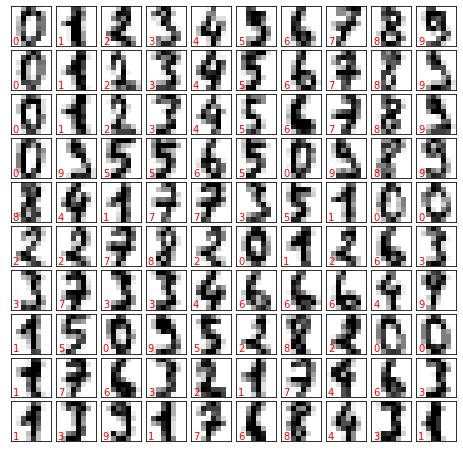

In [4]:
fig,axes = plt.subplots(10,10,figsize = (8,8),subplot_kw={'xticks':[],'yticks':[]}
                                    ,gridspec_kw=dict(hspace = 0.1,wspace = 0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap = 'binary',interpolation='nearest',)
    ax.text(0.05,0.05,str(digits.target[i]),transform = ax.transAxes,color='red')


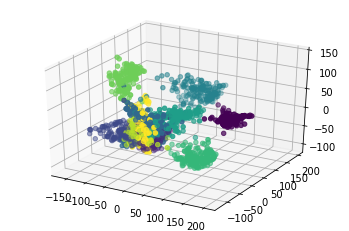

In [10]:
%matplotlib qt 
from sklearn.manifold import Isomap
iso = Isomap(n_components=3)
numbers = iso.fit(digits.data).transform(digits.data)
ax = plt.subplot(projection = '3d')
ax.scatter(numbers[:,0],numbers[:,1],numbers[:,2],c=digits.target,s=)


In [5]:
X=digits.data
X.shape

(1797, 64)

In [6]:
y=digits.target
y.shape

(1797,)

In [28]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

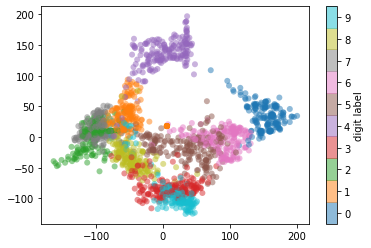

In [29]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,alpha=0.5,edgecolor='none',
            cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

In [73]:
X_train,X_text,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape,X_test.shape)

(1347, 64) (450, 64)


In [74]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8533333333333334

In [76]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_model)

Text(91.68, 0.5, 'true values')

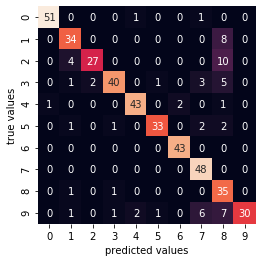

In [77]:
sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('true values')

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()

In [80]:
X = iris.data
y = iris.target

In [81]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [82]:
model.fit(X,y)
y_model = model.predict(X)

In [83]:
accuracy_score(y,y_model)

1.0

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

In [86]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [87]:
y_model = model.predict(X_test)
accuracy_score(y_test,y_model)

0.9466666666666667

In [89]:
from sklearn.model_selection  import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [92]:
from sklearn.model_selection import LeaveOneOut
score = cross_val_score(model,X,y,cv=LeaveOneOut())
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [93]:
score.mean()

0.96

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline

def PolynomalRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))


In [4]:
def make_data(N,err=1.,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10-1./(X.ravel()+.1)
    if err > 0:
        y += err*rng.randn(N)
    return X,y

In [5]:
X,y = make_data(40)

In [6]:
pp(X.shape,y.shape,X,y)

(40, 1) (40,) [[1.73907352e-01]  [ 7.24998644  7.70041705 -0.12288892  3.83970623  1.50418461  1.31600899
               [5.18867376e-01]    1.88404109  5.0456151   5.42819209  6.59281674  5.70193919  8.23148858
               [1.30815988e-08]    1.8305394   9.086429    1.73425177  8.92229631  6.16043712  6.68597765
               [9.14049845e-02]    0.8992155   4.51082693  8.70162943  8.39917725  5.14639037 10.37406543
               [2.15372915e-02]    8.96816213  9.50648826  0.9746409  -0.20201375  1.09605993  8.50272859
               [8.52641608e-03]    0.67301646  6.98083184  9.856233    8.32873282  8.55755817  5.87386864
               [3.46928663e-02]    7.49515774  9.997533    0.54626444  8.1929663 ]                       
               [1.19412216e-01]                                                                          
               [1.57424429e-01]                                                                          
               [2.90323473e-01]               

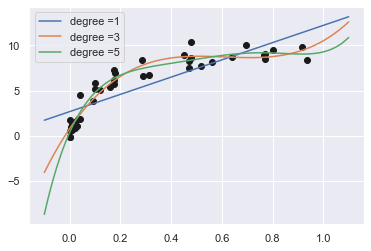

In [7]:
sns.set()
X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='k')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomalRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree ={0}'.format(degree))
plt.legend(loc = 'best')

Text(0, 0.5, 'score')

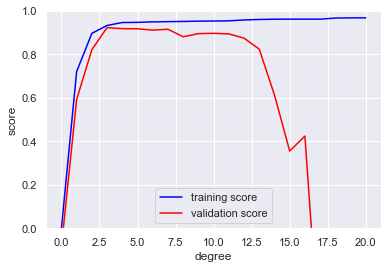

In [8]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score,val_score = validation_curve(PolynomalRegression(),X,y,'polynomialfeatures__degree',degree,cv=7)

plt.plot(degree, np.median(train_score,1),color = 'blue',label = 'training score')
plt.plot(degree, np.median(val_score,1),color='red',label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

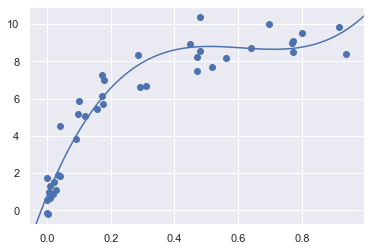

In [9]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomalRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

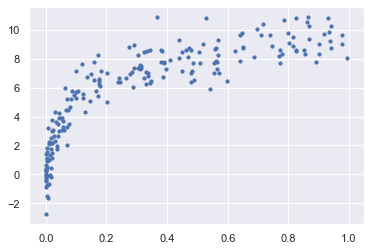

In [10]:
X2,y2 = make_data(200)
plt.scatter(X2.ravel(),y2,s=10)

(0, 1)

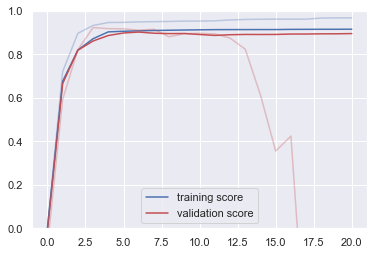

In [11]:
degree = np.arange(21)
train_score2 ,val_score2 = validation_curve(PolynomalRegression(),X2,y2,
                                           'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score2,1),color = 'b',label = 'training score')
plt.plot(degree,np.median(val_score2,1),color='r',label='validation score')
plt.plot(degree,np.median(train_score,1),color = 'b',alpha = 0.3)
plt.plot(degree,np.median(val_score,1),color='r',alpha=0.3)
plt.legend(loc='lower center')
plt.ylim(0,1)

## Learning curves in Scikit-learn

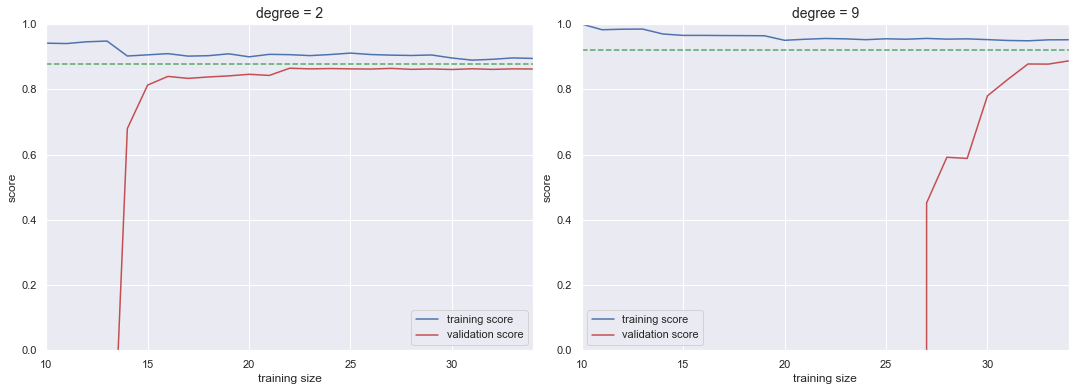

In [12]:
from sklearn.model_selection import learning_curve

fig,ax = plt.subplots(1,2,figsize = (16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i,degree in enumerate([2,9]):
    N,train_lc,val_lc = learning_curve(PolynomalRegression(degree),X,y,cv=7,train_sizes=np.linspace(0.3,1,25))
    
    ax[i].plot(N,np.mean(train_lc,1),color='b',label='training score')
    ax[i].plot(N,np.mean(val_lc,1),color='r',label='validation score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='g',linestyle = 'dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree),size=14)
    ax[i].legend(loc='best')

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
             'linearregression__fit_intercept':[True,False],
             'linearregression__normalize':[True,False]}
grid = GridSearchCV(PolynomalRegression(),param_grid,cv=7)

In [14]:
grid.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [15]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [16]:
model = grid.best_estimator_

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

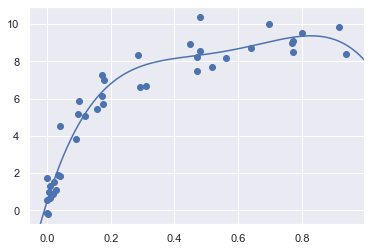

In [17]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

# Feature Engineerign

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
data = [{'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
       {'price':700000,'rooms':3,'neighborhood':'Fremont'},
       {'price':650000,'rooms':3,'neighborhood':'Wallingford'},
       {'price':600000,'rooms':2,'neighborhood':'Fremont'},]

In [20]:
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [21]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [22]:
vec = DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [23]:
sample = ['problem of evil','evil queen','horizon problem']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [26]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vec = TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


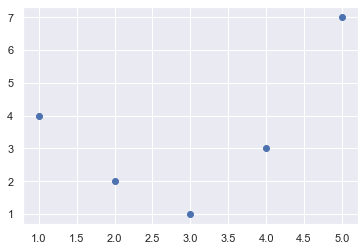

In [29]:
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y)

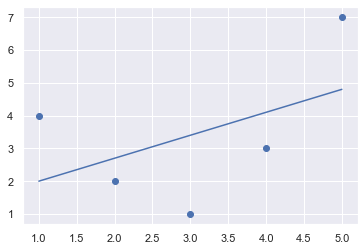

In [30]:
from sklearn.linear_model import LinearRegression
X = x[:,np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


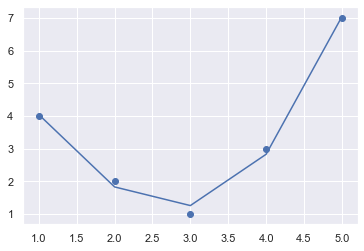

In [32]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit)

## imputation of missing data

In [33]:
from numpy import nan

In [34]:
X = np.array([[nan,0,3],[3,7,9],[3,5,2],[4,nan,6],[8,8,1]])
y = np.array([14,16,-1,8,-5]) 

In [35]:
from sklearn.preprocessing import Imputer

In [36]:
imp = Imputer(strategy='mean')
X2= imp.fit_transform(X)
X2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [37]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [38]:
from sklearn.pipeline import make_pipeline

In [39]:
model = make_pipeline(Imputer(strategy = 'mean'),PolynomialFeatures(degree=2),LinearRegression())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


In [41]:
from sklearn.datasets import make_blobs

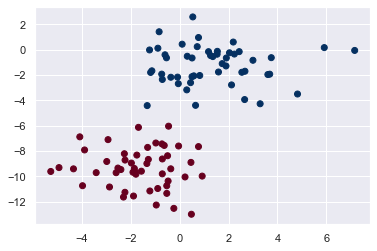

In [42]:
X,y = make_blobs(100,2,centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu')

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
rng = np.random.RandomState(0)
Xnew = [-6,-14]+[14,18] * rng.rand(4000,2)
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

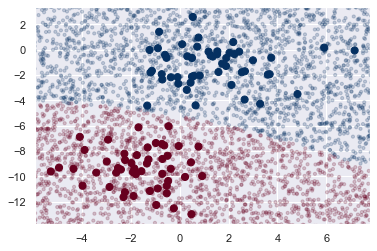

In [46]:
plt.scatter(X[:,0],X[:,1],c=y ,s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1], c=ynew, s=10, cmap='RdBu',alpha=0.2)
plt.axis(lim)

In [47]:
yprob = model.predict_proba(Xnew)
yprob[-10:].round(3)

array([[0.093, 0.907],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ]])

In [48]:
from sklearn.datasets import fetch_20newsgroups

In [49]:
news = fetch_20newsgroups()

In [50]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [51]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [52]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [54]:
model =  make_pipeline(TfidfVectorizer(), MultinomialNB())

In [55]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

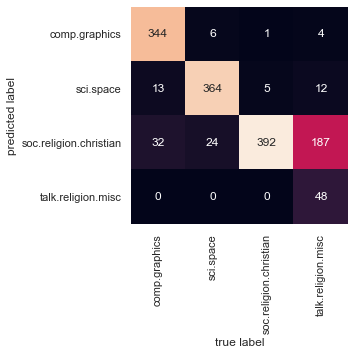

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False, 
           xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [57]:
print(test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
test.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [59]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [60]:
predict_category('sending a payload to the ISS')


'sci.space'

In [61]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [62]:
predict_category('determining the screen resolution')

'comp.graphics'

## simple linaer regression

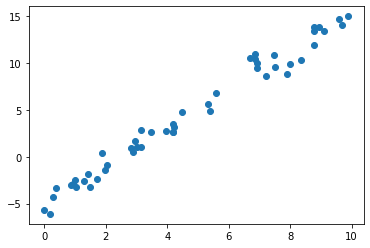

In [3]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x-5+rng.randn(50)
plt.scatter(x,y)

In [4]:
from sklearn.linear_model import LinearRegression 

In [5]:
model = LinearRegression(fit_intercept=True)

In [6]:
model.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:,np.newaxis])

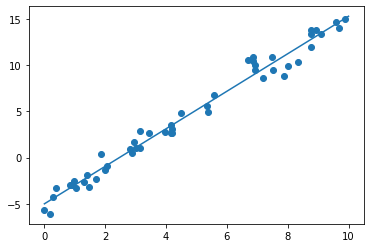

In [8]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [9]:
print(model.coef_)
print(model.intercept_)

[2.02720881]
-4.998577085553202


In [10]:
rng = np.random.RandomState(1)
X = 10*rng.rand(100,3)
y = 0.5 + np.dot(X,[1.5,-2.,1.])

In [11]:
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

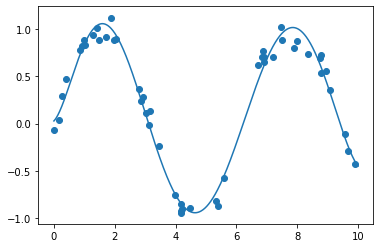

In [16]:
rng = np.random.RandomState(1)
x = 10* rng.rand(50)
y = np.sin(x)+0.1*rng.randn(50)
poly_model.fit(x[:,np.newaxis],y)
yfit = poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

(0, 10)

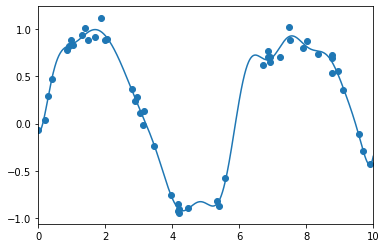

In [18]:
class GaussianFeatures(BaseEstimator,TransformerMixin):
    """
        Uniformly spaced Gaussian features for one-dimensional input
    """
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y)/width
        return np.exp(-0.5*np.sum(arg **2,axis))
        
        
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(),X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform (self, X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit = gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)

## Regularization

(-1.5, 1.5)

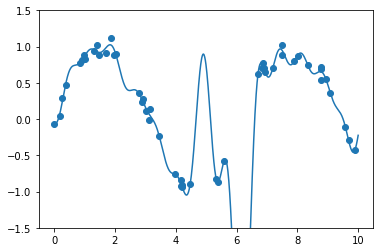

In [19]:
model = make_pipeline(GaussianFeatures(30),LinearRegression())
model.fit(x[:,np.newaxis],y)

plt.scatter(x,y)
plt.plot(xfit,model.predict(xfit[:,np.newaxis]))
plt.ylim(-1.5,1.5)

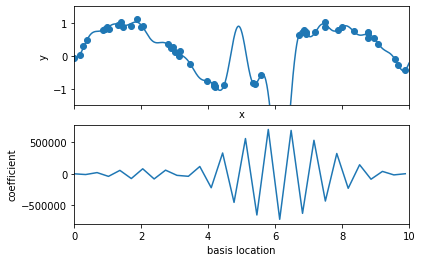

In [20]:
def basis_plot(model,title=None):
    fig, ax = plt.subplots(2,sharex=True)
    model.fit(x[:,np.newaxis],y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel='x',ylabel = 'y', ylim=(-1.5,1.5))
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',xlim=(0,10))
    
model = make_pipeline(GaussianFeatures(30),LinearRegression())
basis_plot(model)

### L2 regularization

In [21]:
from sklearn.linear_model import Ridge

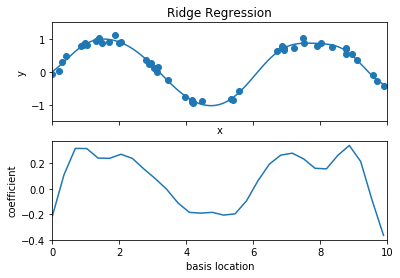

In [22]:
model = make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model, title = "Ridge Regression")

In [23]:
from sklearn.linear_model import Lasso

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870486668, tolerance: 0.002065280097246271
  positive)


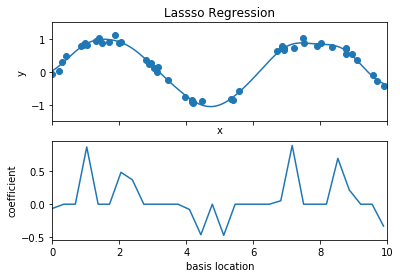

In [27]:
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title = 'Lassso Regression')

## Predict bicycle traffic

In [29]:
counts = pd.read_csv('remont_hourly.csv',index_col="Date",parse_dates=True)
weather = pd.read_csv('599021',index_col='DATE',parse_dates=True)

FileNotFoundError: [Errno 2] File b'remont_hourly.csv' does not exist: b'remont_hourly.csv'